In [1]:
import os,glob
import matplotlib.pyplot as plt
from PIL import Image
import face_recognition
import cv2
import numpy as np

%matplotlib inline

In [3]:
imgdir="../../Images/imgs/final"
dirname="imgs/cvdata/"
imgdir=os.path.join( imgdir,"*.jpg")
outputimgdir="imgs/cvdata"
img_list = glob.glob(imgdir)

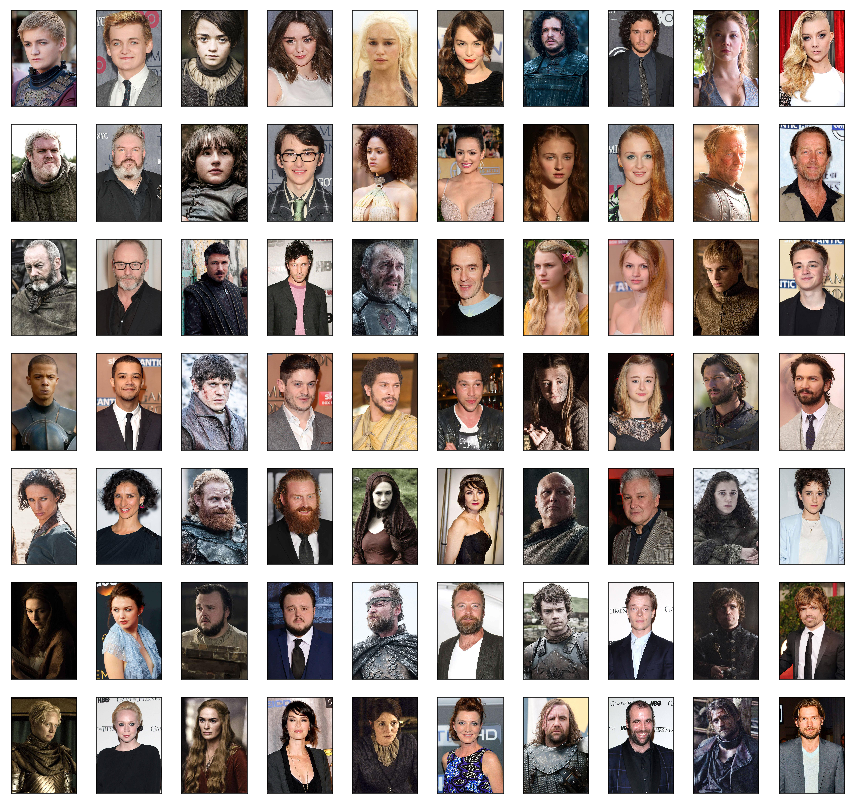

In [4]:
fimages = glob.glob('../../Images/imgs/final/*.jpg')
fimgarray=[""]*len(fimages)
i=0
for fn in fimages:
    fimgarray[i]=fn
    i=i+1 
fig = plt.figure(figsize=(12, 16))
# list all images
for i in range(len(fimages)):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(face_recognition.load_image_file(fimgarray[i]))
plt.tight_layout()  

In [5]:
i,j=0,0;
for img in img_list:
    image = face_recognition.load_image_file(img)
    face_locations = face_recognition.face_locations(image)
    
    for face_location in face_locations:

        # Print the location of each face in this image
        top, right, bottom, left = face_location

        # You can access the actual face itself like this:
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)
        #pil_image.show()
        pil_image.save(outputimgdir+"/"+str(i)+"-1.jpg")
        i=i+1;    

In [6]:
images = glob.glob('imgs/cvdata/*.jpg')
imgarray=[""]*len(images)
i=0
for fn in images:
    imgarray[i]=fn
    i=i+1 

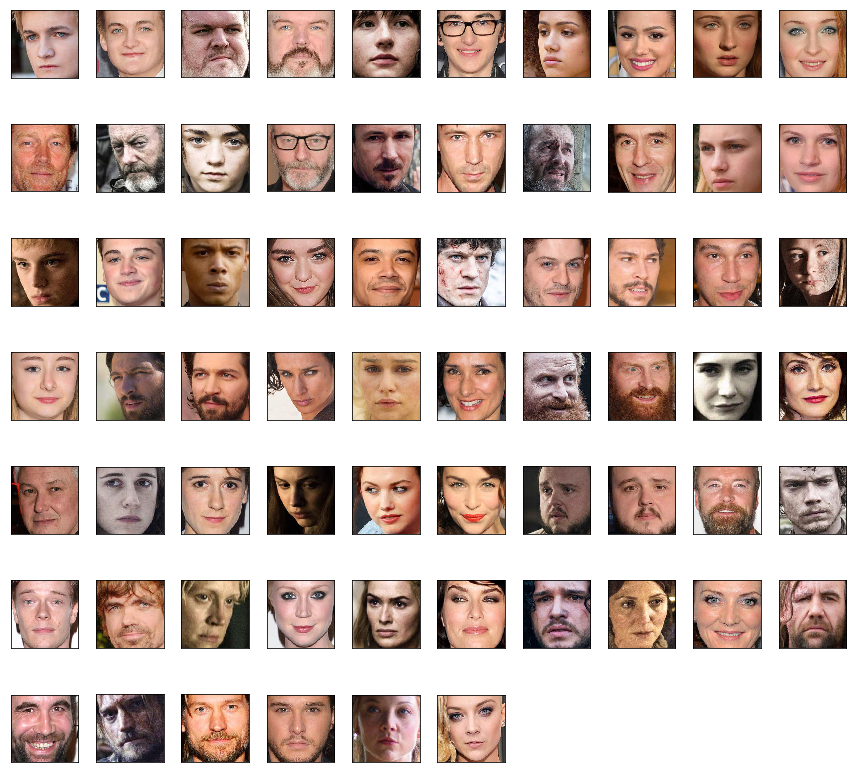

In [7]:
fig = plt.figure(figsize=(12, 16))
# list all images
for i in range(len(images)):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(face_recognition.load_image_file(imgarray[i]))
plt.tight_layout()  

Face Recognition Again
---
夏于喬？宋芸樺？

1. load imgs<br>```img1 = face_recognition.load_image_file(ImgFile)```<br>
   return 3d array;
2. encode images, crop the face data and return 128-dimension face encoding,<br>```img1_face_encodings = face_recognition.face_encodings(img1)[0]```
3. Identification: compare encodings<br>``` face_recognition.compare_faces([img1_face_encodings], img2_face_encodings)```<br>
   return True/False

face_recognition.face_encodings(img1[top:bottom,left:right])[0]

In [2]:
AImg="imgs/images-1.jpg"
CImg="imgs/images-2.jpg"
DImg="imgs/96086.jpg"
BImg="imgs/images.jpg"
EImg="imgs/images-3.jpg"

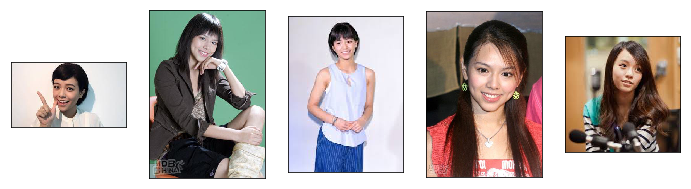

In [3]:
fig= plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 5,1, xticks=[], yticks=[])
ax.imshow(face_recognition.load_image_file(AImg), cmap=plt.cm.gray)
ax = fig.add_subplot(1, 5,2, xticks=[], yticks=[])
ax.imshow(face_recognition.load_image_file(BImg), cmap=plt.cm.gray)
ax = fig.add_subplot(1, 5,3, xticks=[], yticks=[])
ax.imshow(face_recognition.load_image_file(CImg), cmap=plt.cm.gray)
ax = fig.add_subplot(1, 5,4, xticks=[], yticks=[])
ax.imshow(face_recognition.load_image_file(DImg), cmap=plt.cm.gray)
ax = fig.add_subplot(1, 5,5, xticks=[], yticks=[])
ax.imshow(face_recognition.load_image_file(EImg), cmap=plt.cm.gray)

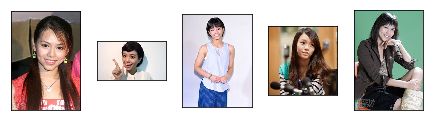

In [4]:
fimages = glob.glob('imgs/*.jpg')
fimgarray=[""]*len(fimages)
i=0
for fn in fimages:
    fimgarray[i]=fn
    i=i+1 
fig = plt.figure(figsize=(12, 16))
# list all images
for i in range(len(fimages)):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(face_recognition.load_image_file(fimgarray[i]))
plt.tight_layout() 

In [39]:
# dim: len_x x len_y x 3
img1=face_recognition.load_image_file(AImg)
print("Image dimension: {}".format(len(img1)),"✕ {}".format(len(img1[0])),
         "✕ {} [r,g,b]".format(len(img1[0][0])))

Image dimension: 168 ✕ 299 ✕ 3 [r,g,b]


Features
---
<img src="imgs/features.gif" width=60% />

In [42]:
face_encoding=face_recognition.face_encodings(img1)
print(" dimension of features of face: {}".format(len(face_encoding[0])))

 dimension of features of face: 128


Note
---
Size of recognized faces'' encoding might be greated more than 1.

there are 2 faces found.


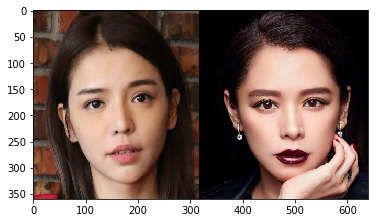

In [49]:
test_faces=face_recognition.load_image_file("imgs/test.jpg")
test_face_encoding=face_recognition.face_encodings(test_faces)
print("there are {} faces found.".format(len(test_face_encoding)))
plt.imshow(test_faces)

In [44]:
def detect_faces_in_image(AImg,BImg):
    img1 = face_recognition.load_image_file(AImg)
    img2 = face_recognition.load_image_file(BImg)
    
    img1_face_encodings = face_recognition.face_encodings(img1)[0]
    img2_face_encodings = face_recognition.face_encodings(img2)[0]
    
    fig= plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 2,1, xticks=[], yticks=[])
    ax.imshow(img1, cmap=plt.cm.gray)
    ax = fig.add_subplot(1, 2,2, xticks=[], yticks=[])
    ax.imshow(img2, cmap=plt.cm.gray)
    
    match_results = face_recognition.compare_faces([img1_face_encodings], img2_face_encodings,tolerance=0.5)
    if match_results[0]:
       print("The persons are alike.")
    else:
       print("They are different persons!") 

Tolerence:  False
They are different persons!


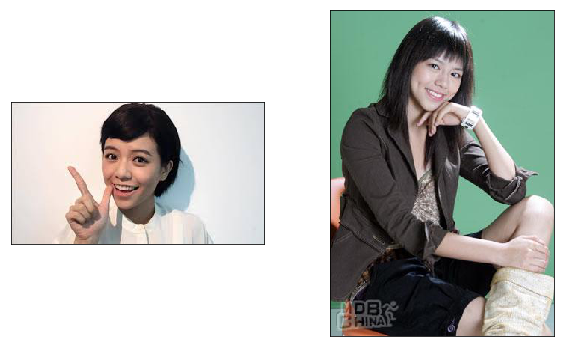

In [36]:
detect_faces_in_image(AImg,BImg)

The persons are alike.


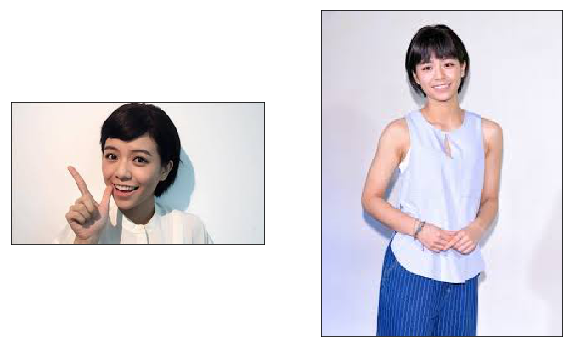

In [9]:
detect_faces_in_image(AImg,CImg)

They are different persons!


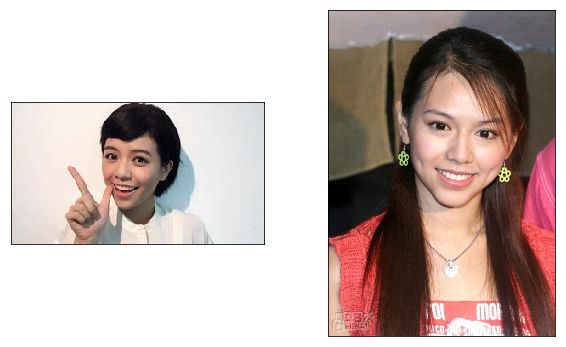

In [137]:
detect_faces_in_image(AImg,DImg)

They are different persons!


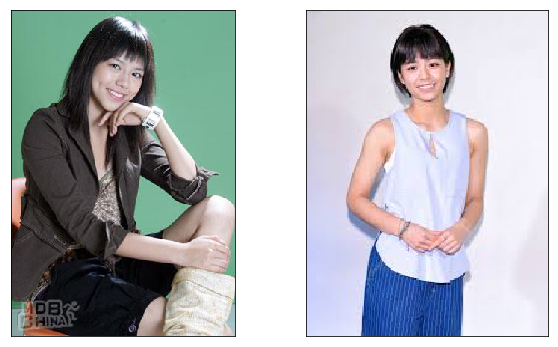

In [10]:
detect_faces_in_image(BImg,CImg)

The persons are alike.


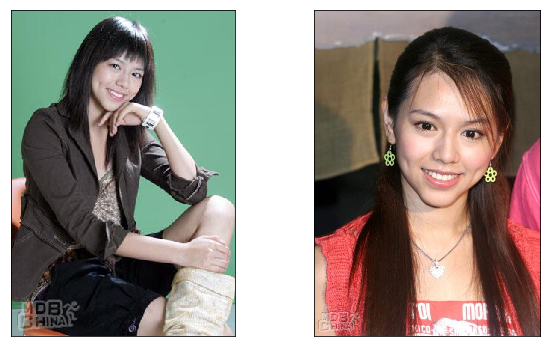

In [11]:
detect_faces_in_image(BImg,DImg)

The persons are alike.


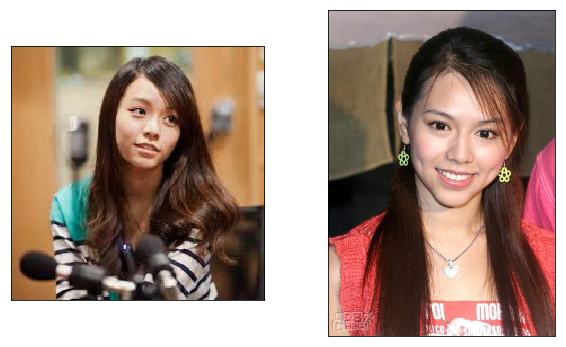

In [12]:
detect_faces_in_image(EImg,DImg)

The persons are alike.


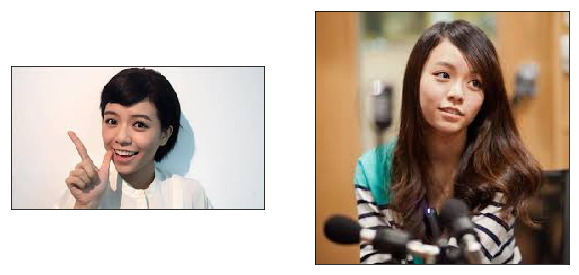

In [13]:
detect_faces_in_image(AImg,EImg)

Compare two of them randomly
---

In [45]:
import numpy
numpy.random.randint(0,len(fimgarray),2)

array([3, 3])

They are different persons!


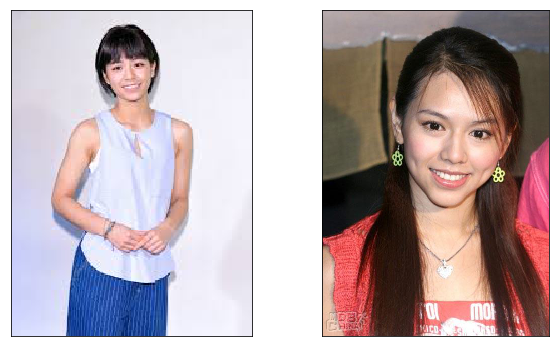

In [63]:
num1 = numpy.random.randint(0,len(fimgarray),2)
detect_faces_in_image(fimgarray[num1[0]],fimgarray[num1[1]])

Summary
---
##### Recognize faces in images and identify who they are

```python
import face_recognition

picture_of_me = face_recognition.load_image_file("me.jpg")
my_face_encoding = face_recognition.face_encodings(picture_of_me)[0]

# compare with any other picture of a face

unknown_picture = face_recognition.load_image_file("unknown.jpg")
unknown_face_encoding = face_recognition.face_encodings(unknown_picture)[0]

# Now we can see the two face encodings are of the same person with `compare_faces`!

results = face_recognition.compare_faces([my_face_encoding], unknown_face_encoding)

if results[0] == True:
    print("It's a picture of me!")
else:
    print("It's not a picture of me!")
```


Note
---


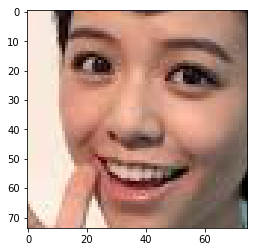

In [142]:
img1=face_recognition.load_image_file(AImg)
img1_location = face_recognition.face_locations(img1)
top, right, bottom, left = img1_location[0]
plt.imshow(img1[top:bottom,left:right])   

In [144]:
face_recognition.face_encodings(img1)[0]


array([-0.08039719,  0.00666765,  0.02499775, -0.05212024, -0.06737375,
       -0.04610445, -0.05395378, -0.08372134,  0.1049685 , -0.06548584,
        0.18532296, -0.1383191 , -0.20608515, -0.03503063, -0.04801458,
        0.20732084, -0.2671347 , -0.11908943, -0.00559921,  0.05821384,
        0.13308096,  0.00611203,  0.01288084,  0.10822298, -0.16614097,
       -0.36950415, -0.03716765, -0.10303369, -0.01673174, -0.08811453,
       -0.02066316,  0.05253246, -0.20236771, -0.01019072,  0.03667597,
        0.09173461,  0.033704  , -0.12892033,  0.20071368,  0.02795131,
       -0.37132251,  0.06562842,  0.10138553,  0.18853214,  0.13796073,
        0.02031497, -0.06054205, -0.12448213,  0.15736084, -0.25025287,
        0.07731103,  0.09767555,  0.07827708,  0.00593655, -0.00767534,
       -0.15005209,  0.02448103,  0.15300444, -0.24025068,  0.01530641,
        0.0546184 , -0.02172589,  0.09972777, -0.06688992,  0.11661437,
        0.1240679 , -0.08850995, -0.13500184,  0.09057648, -0.14

In [145]:
face_recognition.face_encodings(img1[top:bottom,left:right])[0]


array([-0.09285921,  0.04118612,  0.04459456, -0.07854691, -0.06451837,
       -0.05310184, -0.03398759, -0.08736316,  0.07680544, -0.10058454,
        0.20448989, -0.16554099, -0.22105126, -0.04015923, -0.02818663,
        0.23277426, -0.2578958 , -0.13617788, -0.01525191,  0.05992323,
        0.1351299 , -0.02713614,  0.01955857,  0.11449001, -0.16912371,
       -0.35201609, -0.0341163 , -0.0903925 , -0.03090641, -0.09150827,
       -0.0190965 ,  0.05043823, -0.19766437,  0.00672316,  0.02116369,
        0.10443199,  0.02833517, -0.13811406,  0.1999457 ,  0.00284746,
       -0.36691725,  0.0535319 ,  0.11726803,  0.20109005,  0.14367104,
        0.0033379 , -0.05825162, -0.14110009,  0.12281886, -0.26382855,
        0.09834655,  0.07756992,  0.02843723,  0.03263561,  0.01450516,
       -0.15608132,  0.05449797,  0.15348366, -0.23982653,  0.01392455,
        0.06129662, -0.02185122,  0.0940396 , -0.08397159,  0.15826681,
        0.13711159, -0.11028513, -0.12803531,  0.09397766, -0.12

Note
---
More about Face_recognition Functions

**1.** face_recognition.face_locations, return array of pair: <font color="brown">[top, right, bottom, left]</font>

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 47, Left: 96, Bottom: 121, Right: 171


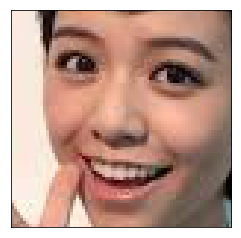

In [77]:

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("imgs/images-1.jpg")

# Find all the faces in the image
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    #pil_image = Image.fromarray(face_image)
    #pil_image.show()
    plt.imshow(face_image)
    plt.xticks([]),plt.yticks([])

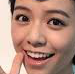

In [79]:
pil_image = Image.fromarray(face_image)
pil_image
#plt.savefig(face_image,"data/test1.png")

I found 1 face(s) in this photograph.
The chin in this face has the following points:
 [(108, 66), (107, 74), (107, 83), (109, 91), (112, 99), (116, 107), (120, 115), (124, 123), (129, 127), (137, 127), (146, 124), (155, 118), (163, 111), (169, 103), (173, 94), (176, 83), (178, 73)]
The left_eyebrow in this face has the following points:
 [(109, 56), (112, 53), (117, 53), (122, 54), (127, 57)]
The right_eyebrow in this face has the following points:
 [(139, 58), (146, 56), (154, 56), (161, 59), (166, 64)]
The nose_bridge in this face has the following points:
 [(132, 67), (131, 74), (129, 80), (128, 86)]
The nose_tip in this face has the following points:
 [(123, 89), (125, 91), (129, 92), (133, 92), (137, 92)]
The left_eye in this face has the following points:
 [(113, 66), (117, 63), (121, 63), (125, 68), (121, 68), (116, 67)]
The right_eye in this face has the following points:
 [(144, 71), (148, 67), (154, 67), (158, 71), (154, 72), (148, 72)]
The top_lip in this face has the follo

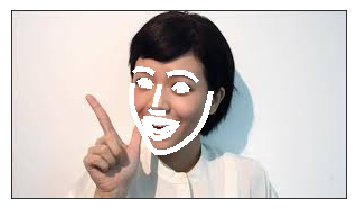

In [52]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("imgs/images-1.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    facial_features = [
        'chin',
        'left_eyebrow',
        'right_eyebrow',
        'nose_bridge',
        'nose_tip',
        'left_eye',
        'right_eye',
        'top_lip',
        'bottom_lip'
    ]

    for facial_feature in facial_features:
        print("The {} in this face has the following points:\n {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    pil_image = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image)

    for facial_feature in facial_features:
        d.line(face_landmarks[facial_feature], width=5)

    # picture display in independent Windows
    # pil_image.show()
    plt.imshow(pil_image)
    plt.xticks([]),plt.yticks([])

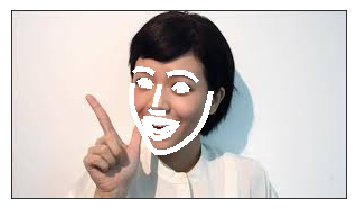

In [54]:
plt.imshow(pil_image)
plt.xticks([]),plt.yticks([]);

In [55]:
# Load some images to compare against
known_obama_image = face_recognition.load_image_file("obama.jpg")
known_biden_image = face_recognition.load_image_file("biden.jpg")

# Get the face encodings for the known images
obama_face_encoding = face_recognition.face_encodings(known_obama_image)[0]
biden_face_encoding = face_recognition.face_encodings(known_biden_image)[0]

known_encodings = [
    obama_face_encoding,
    biden_face_encoding
]

# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("obama2.jpg")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()



The test image has a distance of 0.38 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.76 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? False
- With a very strict cutoff of 0.5, would the test image match the known image? False



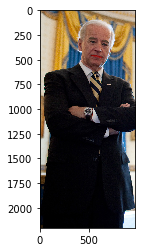

In [59]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("biden.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

for face_landmarks in face_landmarks_list:
    pil_image = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

    #pil_image.show()
    plt.imshow(pil_image)


In [82]:
import face_recognition
import cv2

# This is a super simple (but slow) example of running face recognition on live video from your webcam.
# There's a second example that's a little more complicated but runs faster.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Find all the faces and face enqcodings in the frame of video
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    # Loop through each face in this frame of video
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        match = face_recognition.compare_faces([obama_face_encoding], face_encoding)

        name = "Unknown"
        if match[0]:
            name = "Barack"

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()



KeyboardInterrupt: 